In [11]:
import os, shutil
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras import optimizers
from keras import regularizers
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
# check image directory 

base_dir = 'C:/Users/vuduc/Thermal_face_reg/src/data_set/'
train_dir = os.path.join(base_dir, 'train')
print(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
print(validation_dir)
test_dir = os.path.join(base_dir, 'test')
print(test_dir)

C:/Users/vuduc/Thermal_face_reg/src/data_set/train
C:/Users/vuduc/Thermal_face_reg/src/data_set/validation
C:/Users/vuduc/Thermal_face_reg/src/data_set/test


In [13]:
num_class = 4
batch = 32
weight_decay = 1e-4

# propose CNN model
model = Sequential()
model.add(Conv2D(batch, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(72, 96, 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(batch, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(2*batch, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(2*batch, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(4*batch, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(4*batch, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(8*batch, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(8*batch, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(num_class, activation='softmax'))
# model.summary()


In [14]:
# training optimize
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
learning_rate = 1e-4
momentum = 0.9
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=learning_rate, momentum=momentum, decay=1e-6), #Decrease learning rate
              metrics=['accuracy'])

#Generate batches of tensor image data with real-time data augmentation.

# train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True)

arg = ImageDataGenerator(rotation_range=0.1, zoom_range=0.1, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # Target directory
        target_size=(72, 96), # resize img to 112x112
        batch_size=2, 
        color_mode='grayscale',
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(72, 96),
        batch_size=2,
        color_mode='grayscale',
        class_mode='categorical')

Found 600 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [15]:
#Training and validation

history = model.fit(
      train_generator,
      batch_size=32, 
      epochs= 40,
      validation_data=validation_generator,
      validation_steps=100)

Epoch 1/40
300/300 [==============================] - 33s 106ms/step - loss: 0.8867 - accuracy: 0.8917 - val_loss: 31.0812 - val_accuracy: 0.2500
Epoch 2/40
300/300 [==============================] - 33s 111ms/step - loss: 0.2832 - accuracy: 0.9700 - val_loss: 1.9713 - val_accuracy: 0.8000
Epoch 3/40
300/300 [==============================] - 32s 108ms/step - loss: 0.2775 - accuracy: 0.9783 - val_loss: 0.8528 - val_accuracy: 0.8200
Epoch 4/40
300/300 [==============================] - 32s 108ms/step - loss: 0.0968 - accuracy: 0.9967 - val_loss: 0.6749 - val_accuracy: 0.9150
Epoch 5/40
300/300 [==============================] - 31s 104ms/step - loss: 0.2228 - accuracy: 0.9850 - val_loss: 0.1367 - val_accuracy: 0.9750
Epoch 6/40
300/300 [==============================] - 33s 111ms/step - loss: 0.1190 - accuracy: 0.9933 - val_loss: 0.3369 - val_accuracy: 0.9600
Epoch 7/40
300/300 [==============================] - 31s 103ms/step - loss: 0.0723 - accuracy: 0.9950 - val_loss: 0.2393 - val_a

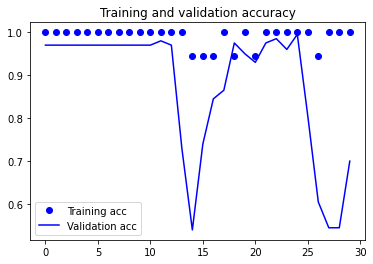

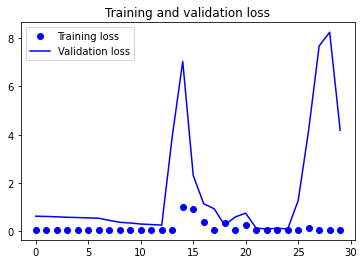

In [10]:
#Plot of the loss and accuracy during training

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
#Test stage
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(72, 96),
        batch_size=2,
        color_mode='grayscale',
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=30)

Found 120 images belonging to 4 classes.
30/30 [==============================] - 1s 21ms/step - loss: 1.0807 - accuracy: 0.9000
